<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_PANDAS_Drop_Duplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Syntax**

**DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)**

### **Parameters**

**subset: column label or sequence of labels, optional**

- Only consider **certain columns** for identifying duplicates, by default use **all of the columns**.

**keep{‘first’, ‘last’, False}, default ‘first’**

- Determines which duplicates (if any) to keep.

- **first:** Drop duplicates except for the **first occurrence.**

- **last:** Drop duplicates except for the **last occurrence.**

- **False:** Drop **all duplicates.**

**inplacebool, default False**

- Whether to drop duplicates in place or to return a copy.

**ignore_indexbool, default False**

- If True, the resulting axis will be labeled 0, 1, …, n - 1.

**Returns DataFrame or None**

- DataFrame with duplicates removed or None if inplace=True.

-------------------------

#### **Discovering Duplicates**

- Duplicate rows are **rows** that have been registered **more than one time.**

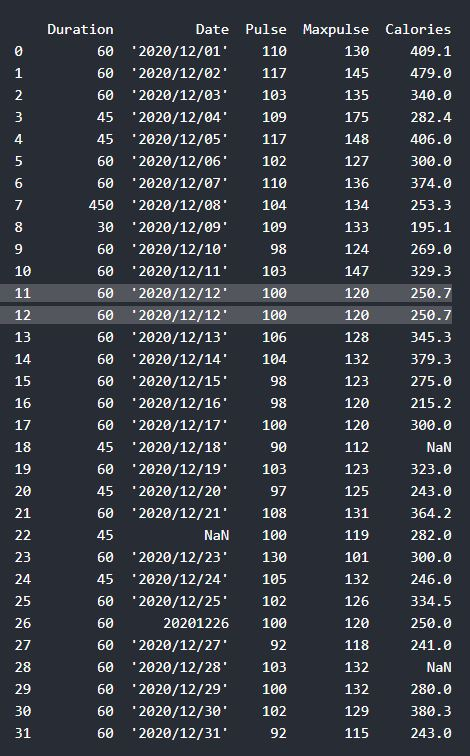

- By taking a look at our test data set, we can assume that **row 11 and 12 are duplicates.**

- To discover duplicates, we can use the **duplicated()** method.

### **Example 1**

In [1]:
import numpy as np
import pandas as pd

In [2]:
d1 = {'A': [1, 1, 1, 2], 'B': [2, 2, 2, 3], 'C': [3, 3, 4, 5]}

source_df = pd.DataFrame(d1)
print('Source DataFrame:\n\n', source_df)

Source DataFrame:

    A  B  C
0  1  2  3
1  1  2  3
2  1  2  4
3  2  3  5


#### **1. Drop Duplicate Rows Keeping the First One**

In [3]:
# keep first duplicate row
result_df = source_df.drop_duplicates()

print('Source DataFrame:\n\n', source_df)
print('\n\nResult DataFrame:\n\n', result_df)

Source DataFrame:

    A  B  C
0  1  2  3
1  1  2  3
2  1  2  4
3  2  3  5


Result DataFrame:

    A  B  C
0  1  2  3
2  1  2  4
3  2  3  5


- The source DataFrame **rows 0 and 1 are duplicates.**

- The **first occurrence** is **kept** and the **rest of the duplicates** are **deleted.**

### **2. Drop Duplicates and Keep Last Row**

In [4]:
result_df = source_df.drop_duplicates(keep='last')
print('Result DataFrame:\n', result_df)

Result DataFrame:
    A  B  C
1  1  2  3
2  1  2  4
3  2  3  5


- The **index ‘0’** is **deleted** and the **last duplicate row ‘1’** is **kept** in the output.

### **3. Delete All Duplicate Rows from DataFrame**

In [5]:
result_df = source_df.drop_duplicates(keep=False)
print('Result DataFrame:\n', result_df)

Result DataFrame:
    A  B  C
2  1  2  4
3  2  3  5


- Both the **duplicate** rows **‘0’ and ‘1’** are **dropped** from the result DataFrame.

### **4. Identify Duplicate Rows based on Specific Columns**

In [6]:
import pandas as pd

d1 = {'A': [1, 1, 1, 2], 'B': [2, 2, 2, 3], 'C': [3, 3, 4, 5]}

source_df = pd.DataFrame(d1)
print('Source DataFrame:\n', source_df)

result_df = source_df.drop_duplicates(subset=['A', 'B'])
print('Result DataFrame:\n', result_df)

Source DataFrame:
    A  B  C
0  1  2  3
1  1  2  3
2  1  2  4
3  2  3  5
Result DataFrame:
    A  B  C
0  1  2  3
3  2  3  5


- The **columns ‘A’ and ‘B’** are used to identify **duplicate rows.** Hence, **rows 0, 1, and 2 are duplicates.** So, **rows 1 and 2** are removed from the output.

### **5. Remove Duplicate Rows in place**

In [7]:
source_df.drop_duplicates(inplace=True)
print(source_df)

   A  B  C
0  1  2  3
2  1  2  4
3  2  3  5


### **Example 2**

In [8]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [9]:
# By default, it removes duplicate rows based on all columns.

df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [10]:
# To remove duplicates on specific column(s), use subset.

df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [11]:
# To remove duplicates and keep last occurrences, use keep.

df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


--------------------

### **Example 3**

Please download the dataset from [here](https://www.kaggle.com/CooperUnion/cardataset) and extract the csv file. Load the csv file as pandas dataframe. 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
## load the csv file 
df = pd.read_csv("/content/drive/MyDrive/Datasets/Car_Features.zip")

## print the head of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
# number of rows before removing duplicated rows
df.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [20]:
df1 = df.copy()

In [15]:
df[df.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


#### **a) Discovering Duplicates**

- The **duplicated()** method returns a **Boolean** values for each row

- Returns **True** for **every row** that is a duplicate, othwerwise **False**

In [27]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11199, dtype: bool


In [22]:
df.duplicated().any()

False

#### **b) Removing Duplicates**

- To **remove duplicates**, use the **drop_duplicates()** method.

In [21]:
# Remove all duplicates
df.drop_duplicates(inplace=True)
df.shape

(11199, 16)

- The **(inplace = True)** will make sure that the method does **NOT return a new DataFrame**, but it will **remove all duplicates** from the **original** DataFrame.

In [16]:
df.duplicated().value_counts()

False    11199
True       715
dtype: int64

#### **c) keep = 'False'**

In [23]:
# drop the duplicated rows and print its head
print("Number ofduplicated rows :", df.duplicated().sum())
df1.drop_duplicates(keep = False, inplace = True)
df1.head()

Number ofduplicated rows : 0


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [24]:
# Count Number of rows after deleting duplicated rows
df1.count()

Make                 10582
Model                10582
Year                 10582
Engine Fuel Type     10579
Engine HP            10513
Engine Cylinders     10552
Transmission Type    10582
Driven_Wheels        10582
Number of Doors      10576
Market Category       7490
Vehicle Size         10582
Vehicle Style        10582
highway MPG          10582
city mpg             10582
Popularity           10582
MSRP                 10582
dtype: int64

#### **d) keep = 'first'**

In [25]:
# drop the duplicated rows and print its head
print("Number ofduplicated rows :", df.duplicated().sum())
df1.drop_duplicates(keep = 'first', inplace = True)
df1.head()

Number ofduplicated rows : 0


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [26]:
# Count Number of rows after deleting duplicated rows
df1.count()

Make                 10582
Model                10582
Year                 10582
Engine Fuel Type     10579
Engine HP            10513
Engine Cylinders     10552
Transmission Type    10582
Driven_Wheels        10582
Number of Doors      10576
Market Category       7490
Vehicle Size         10582
Vehicle Style        10582
highway MPG          10582
city mpg             10582
Popularity           10582
MSRP                 10582
dtype: int64

------------------